# A note on gradient descent and convergence

We have seen in previous notebooks that the gradient descent algorithm is a very useful tool to find minima of functions with sufficiently nice convexity propertys. Although, it is important to remark that under the strongest  convexity properties, the algorithm can fail to reach a minimum. We summarize the algorithm as follows. If $f$ is the function to optimize

\begin{align*}
&  \  \text{intialize } x \text{ to a random value } x_0 \\
&  \ \text{for } i = 1\dots \text{ num iterations do}  \\
&  \qquad  \ \text{compute the gradient }\nabla J = \nabla J(x) \\
&  \qquad  \ \text{update the parameters }\theta \text{ by } \theta \leftarrow \theta - \alpha\nabla f \\
&  \ \text{return } x
\end{align*}

Here $\alpha$ is the learning rate and represents the weight with by which we multiply the gradient to substract it from the current value of the parameters.

Consider the function to optimize given by $J(x)=x^4$ so then $\nabla J(x)=4x^3$. Then $f$ is strictly convex, smooth and has a global minimum at zero. When we start the algorithm, we have to make a random guess $x_0$ for the parameter $x$, which we think is close to the optimum $x_\min$. We also have to choose the learning rate $\alpha$ before we initialize the algorithm. A poor choice of these two parameters can lead not only to the algorithm not to converge, but to diverge and escape from the minimum. 



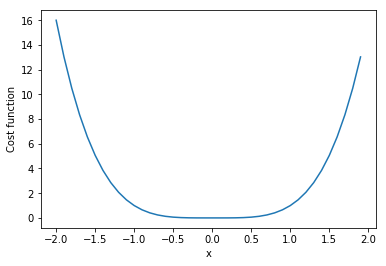

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

L = np.arange(-2.0, 2.0, 0.1)
plt.plot(L,L**4)
plt.xlabel('x')
plt.ylabel('Cost function')
plt.show()

Suppose we make an initial guess of $x_0 = 1$ (in fact, any number larger in modulus than $1$ give the same result), and suppose we take $\alpha = 1$. Then, we get the following sequence of updates and costs:

\begin{align*}
&1) \quad x_0 = 0 \ , \  J(x_0) = 1 \\
&2) \nabla J (x_0) = 4, \quad x_0 \leftarrow x_0 - \alpha\nabla J(x_0)=1-1\cdot4 = -3 \ , \  J(x_0) = 81 \\
&3) \nabla J (x_0) = -108, \quad x_0 \leftarrow x_0 - \alpha\nabla J(x_0)=-3-1\cdot (-108) = 105 \ , \  J(x_0) = 121550625  \\
&\text{and so on.}
\end{align*}

Let us quickly implement the gradient descent algorithm for this cost function with these parameters:

In [3]:
def cost_function(x):
    return float(x**4)

def gradient(x):
    return 4*x**3

def gradient_descent(x0,learn_rate,num_iter):
    x = x0
    C = []
    for i in range(num_iter):
        x = x - learn_rate*gradient(x)
        C.append(cost_function(x))
    return C

We run the algorithm and plot the logarithm of the cost as a function of the number of iterations. Note that with only $5$ iterations we reach astronomical numbers.

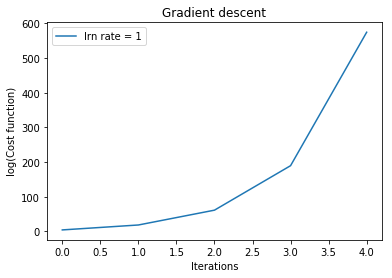

In [4]:
GD_cost = gradient_descent(1,1,5)
plt.plot(range(len(GD_cost)),np.log(GD_cost))
plt.title('Gradient descent')
plt.xlabel('Iterations')
plt.ylabel('log(Cost function)')
plt.legend(['lrn rate = 1'])
plt.show()

There are many ways to solve this issue. Randomizing the starting point is always recommended, and shrinking the learning rate as we iterate the algorithm also helps avoiding this kind of situation.

In [5]:
def shrinking_rate(num_iter):
    x = np.random.rand(1)
    C = []
    learn_rate = 1
    for i in range(num_iter):
        x = x - learn_rate*gradient(x)
        learn_rate = learn_rate/2
        C.append(cost_function(x))
    return C

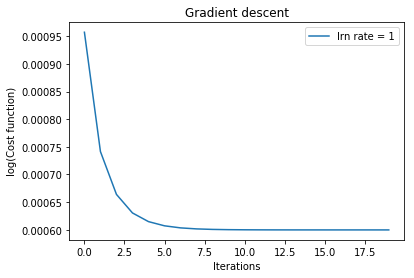

In [6]:
GD_cost = shrinking_rate(20)
plt.plot(range(len(GD_cost)),(GD_cost))
plt.title('Gradient descent')
plt.xlabel('Iterations')
plt.ylabel('log(Cost function)')
plt.legend(['lrn rate = 1'])
plt.show()

We conclude remarking that even though this example might seen artificial, the more general situation is analogue, and this is a problem that can raise if not enough care is taken when tuning the parameters of the model.